# Task 6.5

## Unsupervised Machine Learning: Clustering 

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('data/citibike_clean.csv')

# Display the first few rows of the dataset
data.head()

,trip_id,bike_id,start_station_id,Ride_duration_hrs,start_time,end_time,start_hour,end_hour,start_week,end_week,...,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,subscriber,age,age_group,gender,gender_label,weekday
0,LnQzQk,16013.0,523.0,0.275833,2013-09-09 18:18:55,2013-09-09 18:35:28,18.0,18.0,37.0,37.0,...,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,45.0,40-50,2.0,Female,Mon
1,IL9boN,15230.0,257.0,0.161389,2013-09-12 18:38:53,2013-09-12 18:48:34,18.0,18.0,37.0,37.0,...,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,30.0,30-40,1.0,Male,Thu
2,46clGB,17942.0,479.0,0.100278,2013-09-18 19:44:04,2013-09-18 19:50:05,19.0,19.0,38.0,38.0,...,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,24.0,18-30,1.0,Male,Wed
3,v7vdFt,19683.0,527.0,0.155833,2013-09-28 11:54:37,2013-09-28 12:03:58,11.0,12.0,39.0,39.0,...,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,25.0,18-30,2.0,Female,Sat
4,HbKJBz,14581.0,293.0,0.118611,2013-09-27 22:01:01,2013-09-27 22:08:08,22.0,22.0,39.0,39.0,...,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,Subscriber,27.0,18-30,2.0,Female,Fri


## Numerical columns:

- bike_id
- start_station_id
- Ride_duration_hrs
- start_hour
- end_hour
- start_week
- end_week
- start_station_latitude
- start_station_longitude
- end_station_latitude
- end_station_longitude
- gender
- age

In [25]:
# List of columns to be removed
columns_to_remove = [
    'trip_id', 'start_time', 'end_time', 'start_station_name', 
    'end_station_name', 'subscriber', 'age_group', 
    'gender_label', 'gender', 'weekday','bike_id','start_station_id'
]

# Drop the columns from the dataset
data_cleaned = data.drop(columns=columns_to_remove)

# Standardize the numerical columns
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Display the first few rows of the standardized dataset
data_standardized.head()

,Ride_duration_hrs,start_hour,end_hour,start_week,end_week,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,age
0,0.731276,0.795679,0.764438,-0.505610,-0.505769,1.036745,-0.034521,0.420482,-0.488677,0.695810
1,-0.285300,0.795679,0.764438,-0.505610,-0.505769,-0.782722,-0.940289,-0.300638,0.337110,-0.659418
2,-0.828132,0.997681,0.964914,0.311054,0.310895,1.321815,-0.024196,1.755740,0.214791,-1.201509
3,-0.334648,-0.618335,-0.438414,1.127719,1.127559,0.443029,1.356664,1.123888,1.946102,-1.111161
4,-0.665283,1.603687,1.566340,1.127719,1.127559,-0.220773,0.015855,-0.414244,0.609660,-0.930464


In [26]:
# Removing rows with NaN values
data_standardized_cleaned = data_standardized.dropna()

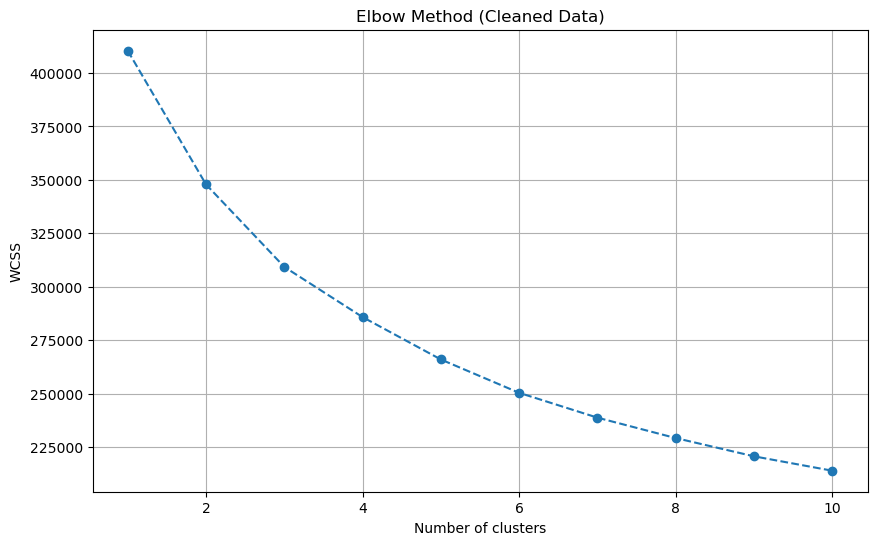

In [27]:
# Re-running the elbow method with the cleaned data
wcss_cleaned = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_standardized_cleaned)
    wcss_cleaned.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss_cleaned, marker='o', linestyle='--')
plt.title('Elbow Method (Cleaned Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [32]:
# Running k-means algorithm with 3 clusters
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42)
data_standardized_cleaned['cluster'] = kmeans_final.fit_predict(data_standardized_cleaned)

# Displaying the first few rows of the dataset with the cluster assignments
data_standardized_cleaned.head()


,Ride_duration_hrs,start_hour,end_hour,start_week,end_week,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,age,cluster
0,0.731276,0.795679,0.764438,-0.505610,-0.505769,1.036745,-0.034521,0.420482,-0.488677,0.695810,1
1,-0.285300,0.795679,0.764438,-0.505610,-0.505769,-0.782722,-0.940289,-0.300638,0.337110,-0.659418,2
2,-0.828132,0.997681,0.964914,0.311054,0.310895,1.321815,-0.024196,1.755740,0.214791,-1.201509,0
3,-0.334648,-0.618335,-0.438414,1.127719,1.127559,0.443029,1.356664,1.123888,1.946102,-1.111161,0
4,-0.665283,1.603687,1.566340,1.127719,1.127559,-0.220773,0.015855,-0.414244,0.609660,-0.930464,0


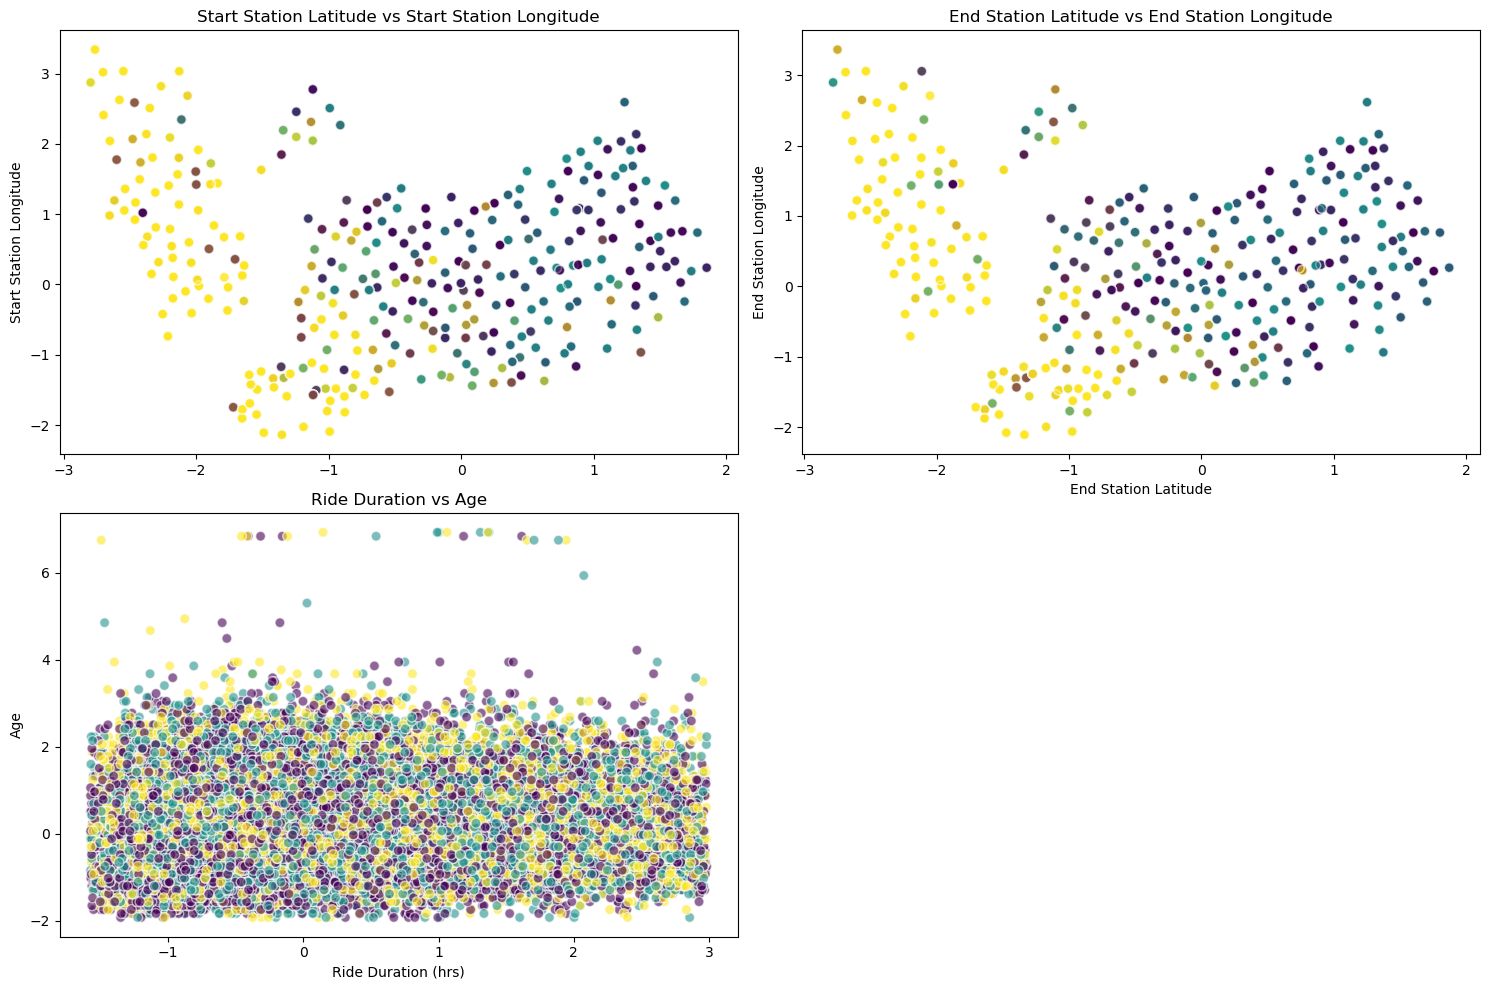

In [33]:
# Creating scatterplots for different variable combinations
plt.figure(figsize=(15, 10))

# Plot 1: start_station_latitude vs start_station_longitude
plt.subplot(2, 2, 1)
plt.scatter(data_standardized_cleaned['start_station_latitude'], 
            data_standardized_cleaned['start_station_longitude'], 
            c=data_standardized_cleaned['cluster'], cmap='viridis', 
            s=50, alpha=0.6, edgecolors='w')
plt.ylabel('Start Station Longitude')
plt.title('Start Station Latitude vs Start Station Longitude')

# Plot 2: end_station_latitude vs end_station_longitude
plt.subplot(2, 2, 2)
plt.scatter(data_standardized_cleaned['end_station_latitude'],
            data_standardized_cleaned['end_station_longitude'], 
            c=data_standardized_cleaned['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w')
plt.xlabel('End Station Latitude')
plt.ylabel('End Station Longitude')
plt.title('End Station Latitude vs End Station Longitude')

# Plot 3: Ride_duration_hrs vs age
plt.subplot(2, 2, 3)
plt.scatter(data_standardized_cleaned['Ride_duration_hrs'], data_standardized_cleaned['age'], 
            c=data_standardized_cleaned['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w')
plt.xlabel('Ride Duration (hrs)')
plt.ylabel('Age')
plt.title('Ride Duration vs Age')

# Adjust layout
plt.tight_layout()
plt.show()


## Discussion on Scatterplots

Latitude vs. Longitude: 
- This plot provides a spatial representation of the clusters based on start station locations. We can see how different clusters are distributed across different geographical regions.

Ride Duration vs. Age: 
- This plot shows the distribution of ride durations across different age groups for each cluster. We can observe trends, such as certain clusters having longer ride durations irrespective of age, while others might show varying ride durations across different ages.


In [34]:
# Calculating descriptive statistics for the clusters
cluster_statistics = data_standardized_cleaned.groupby('cluster').describe()

# Displaying the descriptive statistics for the clusters
cluster_statistics.transpose()


cluster                             0             1             2
Ride_duration_hrs count  16726.000000  13942.000000  10376.000000
                  mean      -0.029796     -0.000757      0.049047
                  std        0.969393      0.979061      1.072055
                  min       -1.570825     -1.570825     -1.570825
                  25%       -0.761512     -0.751642     -0.808393
...                               ...           ...           ...
age               min       -1.924298     -1.924298     -1.924298
                  25%       -0.840115     -0.749767     -0.659418
                  50%       -0.207676     -0.207676     -0.117327
                  75%        0.605461      0.605461      0.695810
                  max        6.839509      6.929858      6.929858

[80 rows x 3 columns]

### Cluster 0

- Ride Duration: Rides in this cluster have a duration that's slightly above the overall average. However, the median suggests that at least half of the rides are shorter than the average of the entire dataset.
- Age: Riders in this cluster are slightly younger than the average. The median age also suggests that at least half of the riders in this cluster are younger than the average rider in the dataset.

### Cluster 1

- Ride Duration: Rides in this cluster are close to the average duration. The median indicates that most rides are slightly shorter than the average.
- Age: The age of riders in this cluster is also close to the average, with the median suggesting that more than half are younger than the overall average.
### Cluster 2

- Ride Duration: This cluster consists of shorter rides when compared to the entire dataset. The median further underscores this by showing most rides in this cluster are notably shorter.
- Age: Riders in this cluster are older on average. The median age further indicates that more than half of the riders in this cluster are older than the average rider in the datase

## Utility of Results in Future Analytics Steps
**Segmentation for Marketing Campaigns:** 
- Based on the clusters, targeted marketing campaigns can be designed. For instance, shorter promotional rides can be offered to Cluster 2, which predominantly consists of older riders with shorter ride durations.

**Operational Planning:** 
- If certain clusters frequently start or end at particular stations, it could guide bike redistribution efforts to ensure availability.

**Product Development:** 
- For clusters that consistently have longer ride durations, considerations for features like more comfortable seating or additional bike features could be explored.

**Predictive Modeling:** 
- The clusters can be used as a feature in predictive models. For example, predicting the likelihood of a user purchasing a membership might vary based on their cluster.

**User Surveys:** 
- Understanding user behavior through these clusters can guide survey design to gather more specific feedback from different user groups.

**Pricing Strategies:**
- Different pricing strategies can be explored for different clusters. For instance, discounts for off-peak hours might attract Cluster 0 users to ride more during non-peak times.